# Лабораторная работа №3

# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных

### Цель лабораторной работы
Изучение способов предварительной обработки данных для дальнейшего формирования моделей.

### Задание
1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
    - обработку пропусков в данных;
    - кодирование категориальных признаков;
    - масштабирование данных.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

Ссылка на датасет: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [4]:
data = pd.read_csv('C:/Users/brusn/Desktop/ТМО/lab3/weatherAUS.csv', sep=",")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
# размер набора данных
data.shape

(142193, 24)

In [6]:
# типы колонок
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [7]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

# Обработка пропусков в числовых данных

Существуют простые стратегии обработки пропусков, такие как удаление или заполнение нулями. Однако в данном случае, если мы будем удалять строки и столбцы с пустыми значениями, то потеряем значительную часть данных. Использовать заполнение нулями будет некорректно, т.к. нулями заполнятся в том числе категориальне колонки.

Будем использовать импьютацию.

In [8]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка MinTemp. Тип данных float64. Количество пустых значений 637, 0.45%.
Колонка MaxTemp. Тип данных float64. Количество пустых значений 322, 0.23%.
Колонка Rainfall. Тип данных float64. Количество пустых значений 1406, 0.99%.
Колонка Evaporation. Тип данных float64. Количество пустых значений 60843, 42.79%.
Колонка Sunshine. Тип данных float64. Количество пустых значений 67816, 47.69%.
Колонка WindGustSpeed. Тип данных float64. Количество пустых значений 9270, 6.52%.
Колонка WindSpeed9am. Тип данных float64. Количество пустых значений 1348, 0.95%.
Колонка WindSpeed3pm. Тип данных float64. Количество пустых значений 2630, 1.85%.
Колонка Humidity9am. Тип данных float64. Количество пустых значений 1774, 1.25%.
Колонка Humidity3pm. Тип данных float64. Количество пустых значений 3610, 2.54%.
Колонка Pressure9am. Тип данных float64. Количество пустых значений 14014, 9.86%.
Колонка Pressure3pm. Тип данных float64. Количество пустых значений 13981, 9.83%.
Колонка Cloud9am. Тип данных float

In [9]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9
142189,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
142190,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
142191,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1


d:\python3_7_4\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\python3_7_4\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


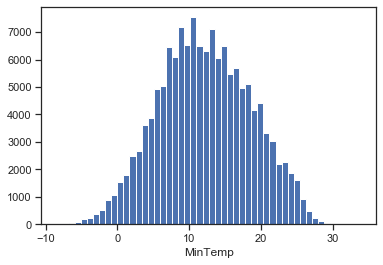

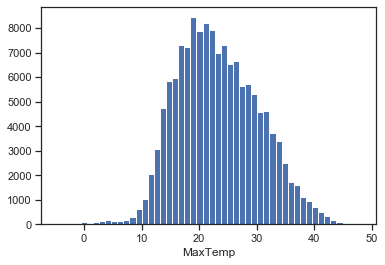

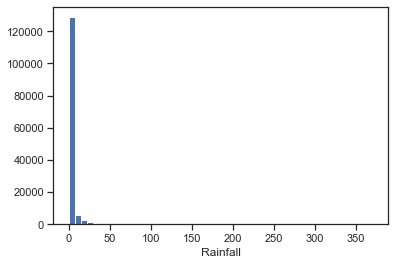

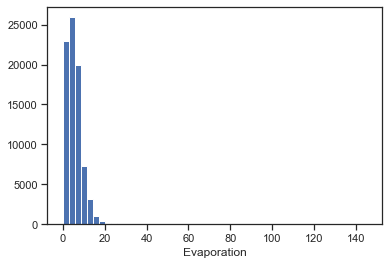

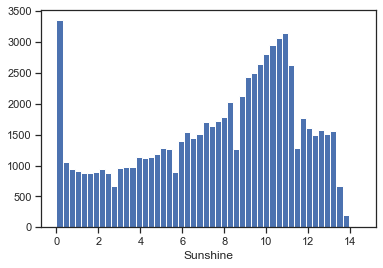

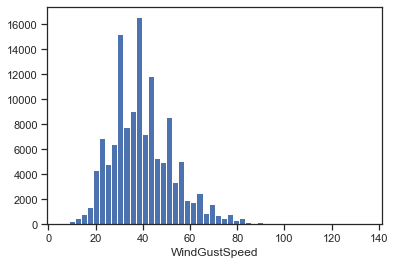

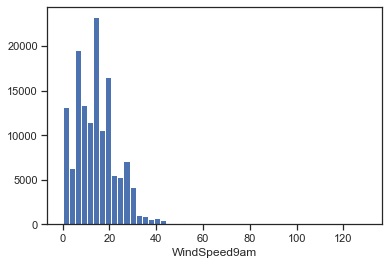

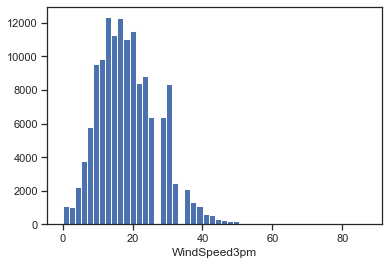

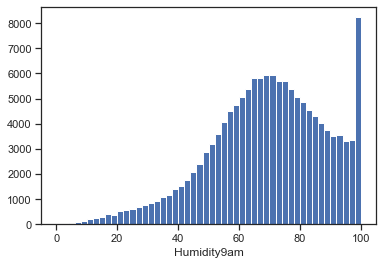

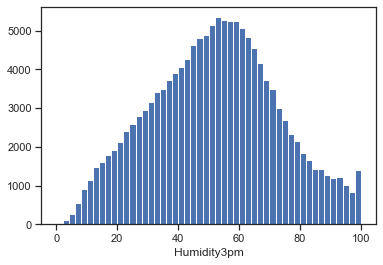

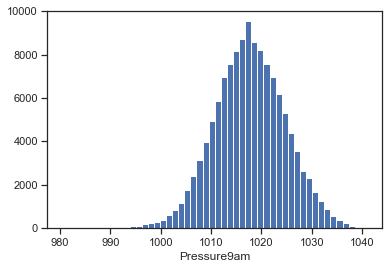

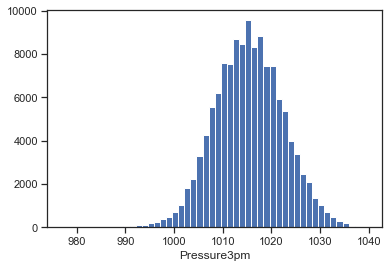

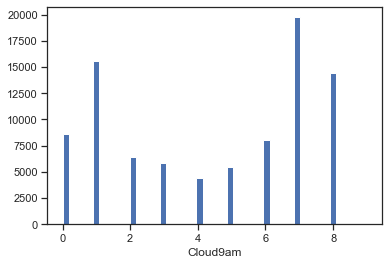

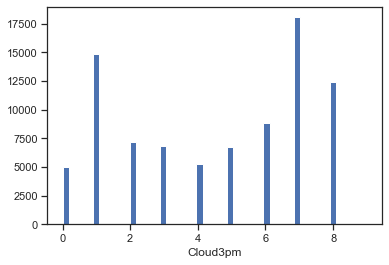

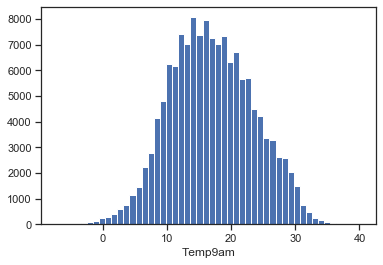

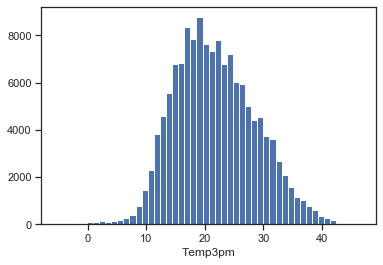

In [10]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [11]:
# Фильтр по пустым значениям поля Rainfall 
data[data['Rainfall'].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
14,2008-12-16,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,...,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,0.0,No
282,2009-09-11,Albury,NaN,18.8,NaN,NaN,NaN,N,31.0,SE,...,46.0,1022.2,1018.2,NaN,NaN,8.7,18.1,NaN,0.0,No
433,2010-02-10,Albury,21.7,35.6,NaN,NaN,NaN,SSW,46.0,NaN,...,28.0,1018.8,1014.7,NaN,4.0,25.2,32.9,NaN,0.0,No
434,2010-02-12,Albury,22.5,29.1,NaN,NaN,NaN,SW,24.0,NaN,...,67.0,1008.5,1007.8,NaN,7.0,23.4,26.4,NaN,0.0,No
439,2010-02-18,Albury,NaN,31.2,NaN,NaN,NaN,ESE,31.0,SSE,...,24.0,1020.4,1019.1,NaN,NaN,21.0,30.0,NaN,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141678,2016-01-21,Uluru,22.4,37.0,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,1010.9,1006.2,4.0,NaN,25.1,35.7,NaN,1.8,Yes
141689,2016-02-03,Uluru,20.6,32.6,NaN,NaN,NaN,S,39.0,SE,...,32.0,1011.5,1008.7,NaN,NaN,22.6,30.0,NaN,0.0,No
141693,2016-02-08,Uluru,23.8,38.3,NaN,NaN,NaN,NaN,NaN,ESE,...,16.0,1015.2,1010.8,NaN,NaN,30.6,36.1,NaN,0.0,No
141828,2016-06-24,Uluru,3.2,17.9,NaN,NaN,NaN,E,44.0,SE,...,39.0,1022.4,1019.0,NaN,NaN,8.8,17.2,NaN,0.6,No


In [12]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Rainfall'].isnull()].index
flt_index

Int64Index([    14,    282,    433,    434,    439,    447,    449,    457,
               603,    974,
            ...
            141076, 141506, 141603, 141651, 141667, 141678, 141689, 141693,
            141828, 142070],
           dtype='int64', length=1406)

In [13]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
14,2008-12-16,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,...,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,0.0,No
282,2009-09-11,Albury,NaN,18.8,NaN,NaN,NaN,N,31.0,SE,...,46.0,1022.2,1018.2,NaN,NaN,8.7,18.1,NaN,0.0,No
433,2010-02-10,Albury,21.7,35.6,NaN,NaN,NaN,SSW,46.0,NaN,...,28.0,1018.8,1014.7,NaN,4.0,25.2,32.9,NaN,0.0,No
434,2010-02-12,Albury,22.5,29.1,NaN,NaN,NaN,SW,24.0,NaN,...,67.0,1008.5,1007.8,NaN,7.0,23.4,26.4,NaN,0.0,No
439,2010-02-18,Albury,NaN,31.2,NaN,NaN,NaN,ESE,31.0,SSE,...,24.0,1020.4,1019.1,NaN,NaN,21.0,30.0,NaN,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141678,2016-01-21,Uluru,22.4,37.0,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,1010.9,1006.2,4.0,NaN,25.1,35.7,NaN,1.8,Yes
141689,2016-02-03,Uluru,20.6,32.6,NaN,NaN,NaN,S,39.0,SE,...,32.0,1011.5,1008.7,NaN,NaN,22.6,30.0,NaN,0.0,No
141693,2016-02-08,Uluru,23.8,38.3,NaN,NaN,NaN,NaN,NaN,ESE,...,16.0,1015.2,1010.8,NaN,NaN,30.6,36.1,NaN,0.0,No
141828,2016-06-24,Uluru,3.2,17.9,NaN,NaN,NaN,E,44.0,SE,...,39.0,1022.4,1019.0,NaN,NaN,8.8,17.2,NaN,0.6,No


In [14]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Rainfall']

14       NaN
282      NaN
433      NaN
434      NaN
439      NaN
          ..
141678   NaN
141689   NaN
141693   NaN
141828   NaN
142070   NaN
Name: Rainfall, Length: 1406, dtype: float64

In [15]:
data_num_Rainfall = data_num[['Rainfall']]
data_num_Rainfall.head()

,Rainfall
0,0.6
1,0.0
2,0.0
3,0.0
4,1.0


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Rainfall)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [18]:
strategies=['mean', 'median','most_frequent']

In [19]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Rainfall)
    return data_num_imp[mask_missing_values_only]

In [20]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([2.34997407, 2.34997407, 2.34997407, ..., 2.34997407, 2.34997407,
        2.34997407]))

In [21]:
strategies[1], test_num_impute(strategies[1])

('median', array([0., 0., 0., ..., 0., 0., 0.]))

In [22]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([0., 0., 0., ..., 0., 0., 0.]))

Используем среднее значение для замены пустых данных:

In [23]:
imp_num = SimpleImputer(strategy='mean')
data_num_imp = imp_num.fit_transform(data[['Rainfall']])
data['Rainfall'] = data_num_imp
data['Rainfall'].isnull().sum()

0

# Обработка пропусков в категориальных данных

In [24]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка WindGustDir. Тип данных object. Количество пустых значений 9330, 6.56%.
Колонка WindDir9am. Тип данных object. Количество пустых значений 10013, 7.04%.
Колонка WindDir3pm. Тип данных object. Количество пустых значений 3778, 2.66%.
Колонка RainToday. Тип данных object. Количество пустых значений 1406, 0.99%.


In [25]:
cat_temp_data = data[['WindGustDir']]
cat_temp_data.head()

,WindGustDir
0,W
1,WNW
2,WSW
3,NE
4,W


In [26]:
cat_temp_data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [27]:
cat_temp_data[cat_temp_data['WindGustDir'].isnull()].shape

(9330, 1)

In [28]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['W'],
       ['WNW'],
       ['WSW'],
       ...,
       ['NNW'],
       ['N'],
       ['SE']], dtype=object)

In [29]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

# Преобразование категориальных признаков в числовые

In [30]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,W
1,WNW
2,WSW
3,NE
4,W
...,...
142188,E
142189,E
142190,NNW
142191,N


In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [32]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [33]:
cat_enc['c1'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [34]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [35]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

# Масштабирование данных

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### MinMax масштабирование

In [48]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Rainfall']])

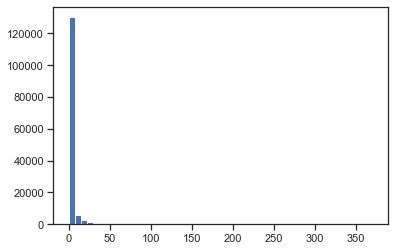

In [49]:
plt.hist(data['Rainfall'], 50)
plt.show()

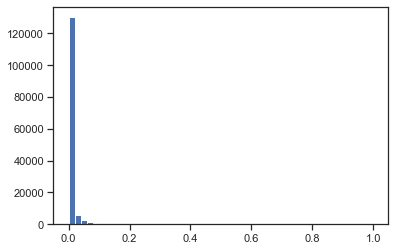

In [50]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование на основе Z-оценки

In [51]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Rainfall']])

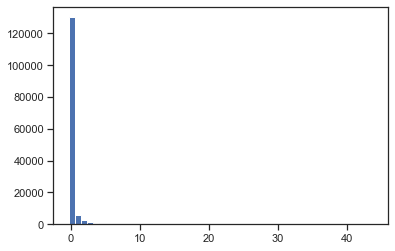

In [52]:
plt.hist(sc2_data, 50)
plt.show()